In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [10]:
iter_num = 5

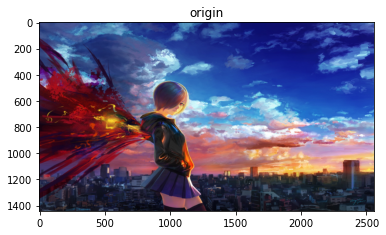

(1440, 2560, 3)


In [11]:
img = cv.imread('./images/547502.jpg')
img = cv.resize(img, dsize=(2560, 1440))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.title('origin')
plt.imshow(img)
plt.show()
print(img.shape)

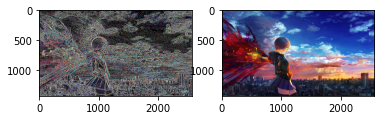

In [12]:
out = cv.pyrDown(img, dstsize=(img.shape[1]//2, img.shape[0]//2))
out = cv.pyrUp(out, dstsize=(img.shape[1], img.shape[0]))
out = img-out
plt.subplot(1, 2, 1)
plt.imshow(out, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

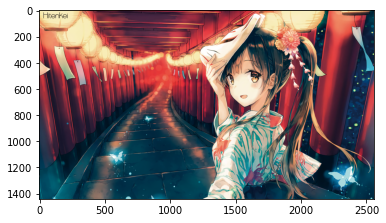

In [13]:
img2 = cv.imread('./images/716428.png')
if img2 is not None:
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.show()
else:
    print('err')

(720, 1280, 3)
(360, 640, 3)
(180, 320, 3)
(90, 160, 3)
(45, 80, 3)
(23, 40, 3)
(12, 20, 3)
(6, 10, 3)


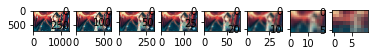

In [14]:
image2 = [img2]
for i in range(iter_num):
    output = cv.pyrDown(image2[i])
    image2.append(output)
    print(output.shape)
    plt.subplot(1, iter_num, i+1)
    plt.imshow(output)
plt.show()

(720, 1280, 3)
(360, 640, 3)
(180, 320, 3)
(90, 160, 3)
(45, 80, 3)
(23, 40, 3)
(12, 20, 3)
(6, 10, 3)


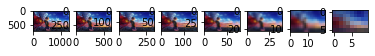

In [15]:
image1 = [img]
for i in range(iter_num):
    output = cv.pyrDown(image1[i])
    image1.append(output)
    print(output.shape)
    plt.subplot(1, iter_num, i+1)
    plt.imshow(output)
plt.show()

(12, 20, 3)
(12, 20, 3)
(23, 40, 3)
(24, 40, 3)


ValueError: operands could not be broadcast together with shapes (23,40,3) (24,40,3) 

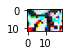

In [16]:
gauss2 = [image2[iter_num]]
for i in range(iter_num, 0, -1):
    output = cv.pyrUp(image2[i])
    print(image2[i-1].shape)
    print(output.shape)
    output = image2[i-1] - output
    gauss2.append(output)
    plt.subplot(1, iter_num, iter_num+1-i)
    plt.imshow(output)
plt.show()


In [ ]:
gauss1 = [image1[iter_num]]
for i in range(iter_num, 0, -1):
    output = cv.pyrUp(image1[i])
    print(image1[i-1].shape)
    print(output.shape)
    output = image1[i-1] - output
    gauss1.append(output)
    plt.subplot(1, iter_num, iter_num+1-i)
    plt.imshow(output)
plt.show()

In [ ]:
res = []

for x, y in zip(gauss1, gauss2):
    col, row, _ = x.shape
    print(f'col={col}, row={row}')
    output = np.hstack((x[:, :row//2,:], y[:, row//2:, :]))
    res.append(output)
    plt.imshow(output)
    plt.show()


In [ ]:
out = res[0]
for i, image in enumerate(res):
    if i == 0:
        continue
    out = cv.pyrUp(out)
    out += image
    plt.imshow(out)
    plt.show()

In [ ]:
out_png = cv.cvtColor(out, cv.COLOR_RGB2BGR)
cv.imwrite('output.png', out_png)